In [1]:
import pandas as pd

In [2]:
df_airline = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: title={'center': 'Airline Passengers'}, xlabel='Month'>

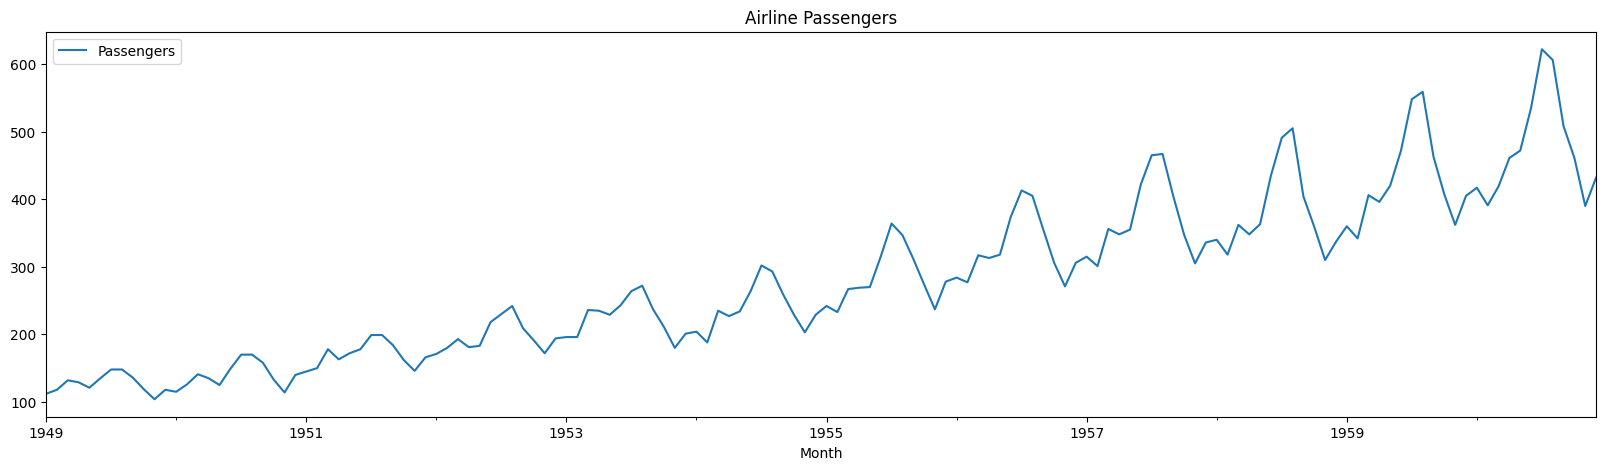

In [4]:
df_airline.plot(title='Airline Passengers', figsize=(20, 5))

In [7]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

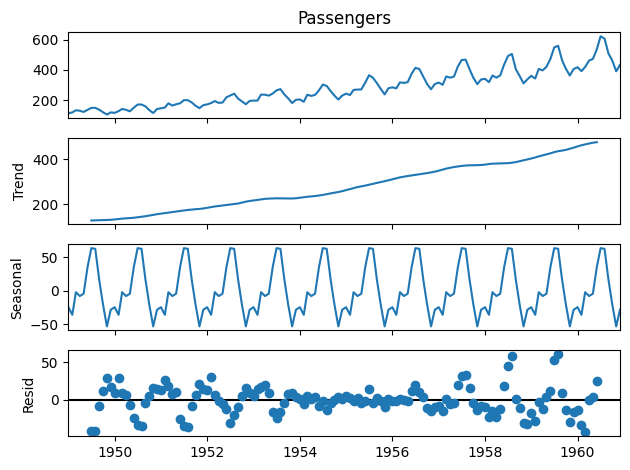

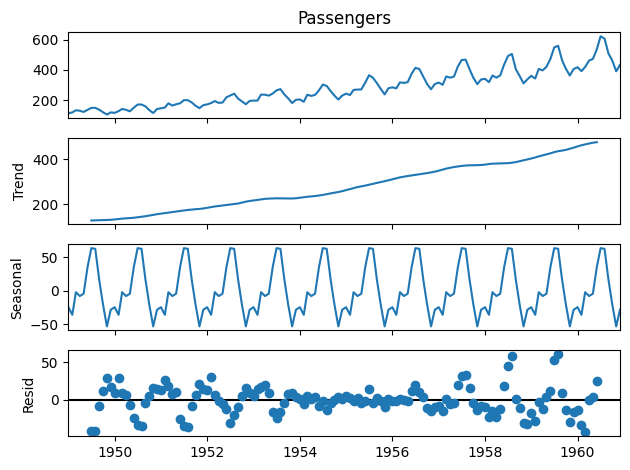

In [6]:
result = seasonal_decompose(df_airline['Passengers'], model='additive')
result.plot()

In [9]:
df_airline.sample(10)

,Passengers
Month,
1956-12-01,306
1954-07-01,302
1957-09-01,404
1953-05-01,229
1954-04-01,227
1955-08-01,347
1959-09-01,463
1960-10-01,461
1955-03-01,267


In [10]:
gdp_cycle_100, gdp_trend_100 = hpfilter(df_airline['Passengers'], lamb=100)

In [12]:
gdp_cycle_1600, gdp_trend_1600 = hpfilter(df_airline['Passengers'], lamb=1600)

In [11]:
gdp_cycle_14400, gdp_trend_14400 = hpfilter(df_airline['Passengers'], lamb=14400)

In [13]:
df_airline['gdp_trend_100'] = gdp_trend_100
df_airline['gdp_cycle_100'] = gdp_cycle_100

In [14]:
df_airline['gdp_trend_1600'] = gdp_trend_1600
df_airline['gdp_cycle_1600'] = gdp_cycle_1600

In [15]:
df_airline['gdp_trend_14400'] = gdp_trend_14400
df_airline['gdp_cycle_14400'] = gdp_cycle_14400

<Axes: title={'center': 'Airline Passengers vs Trend'}, xlabel='Month'>

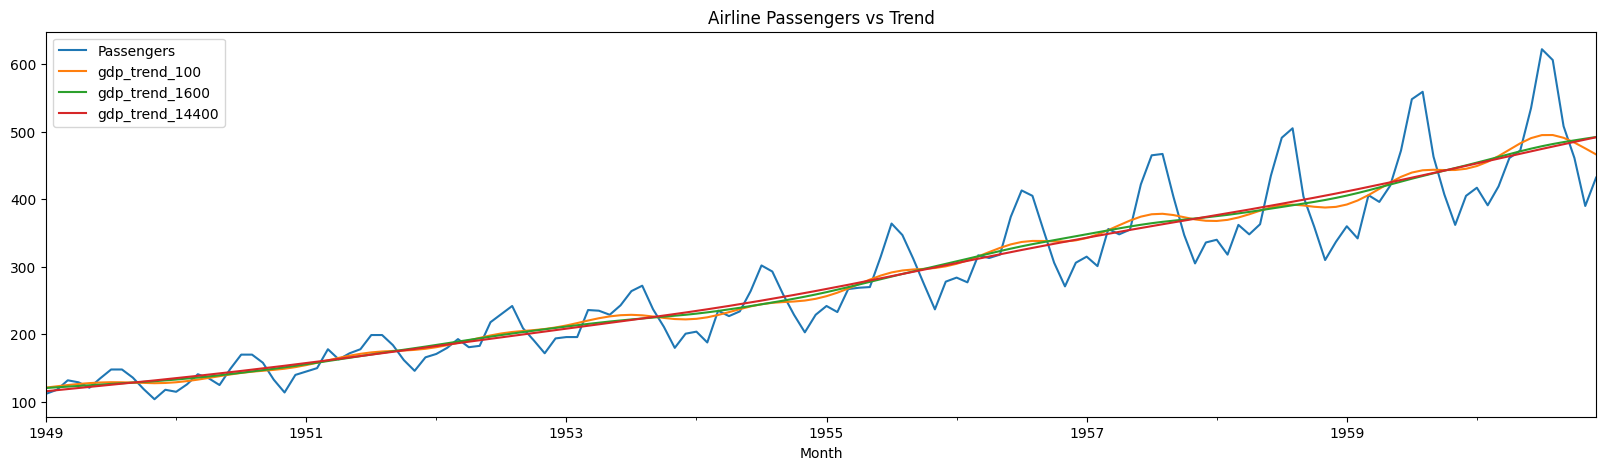

In [21]:
df_airline[['Passengers', 'gdp_trend_100', 'gdp_trend_1600', 'gdp_trend_14400']].plot(title='Airline Passengers vs Trend', figsize=(20, 5))

SMA Simple Movil Average

In [22]:
df_airline['12-month-SMA'] = df_airline['Passengers'].rolling(window=12).mean()

<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

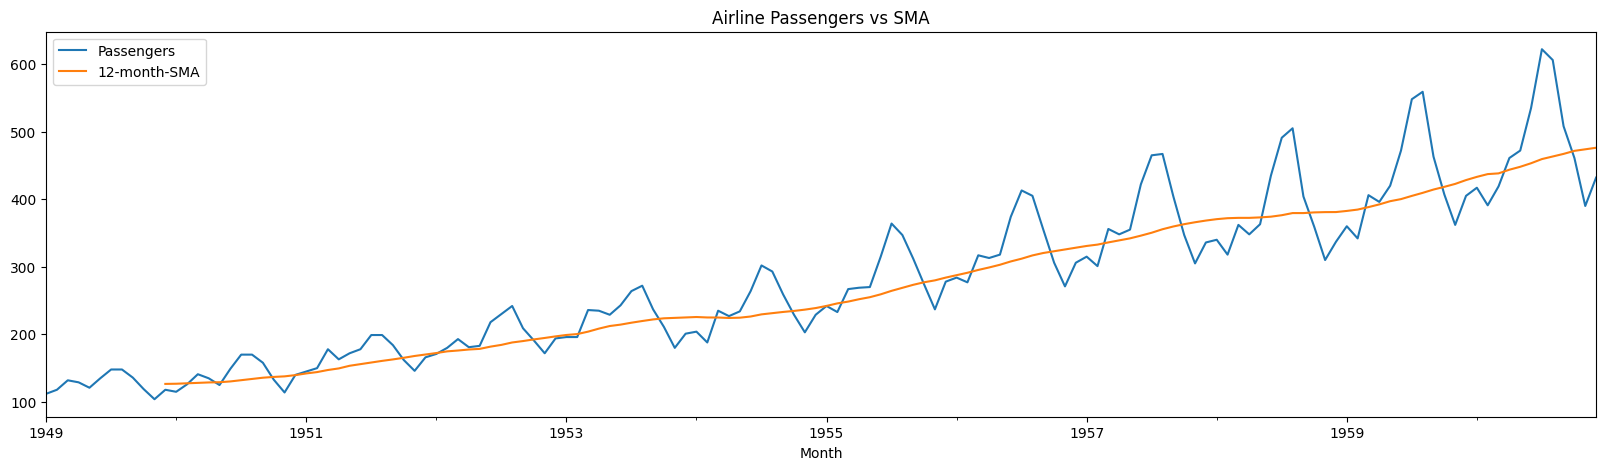

In [31]:
df_airline[['Passengers', '12-month-SMA']].plot(title='Airline Passengers vs SMA', figsize=(20, 5))

In [26]:
df_airline['7-SMA'] = df_airline['Passengers'].rolling(window=7).mean()

In [27]:
df_airline['30-SMA'] = df_airline['Passengers'].rolling(window=30).mean()

In [28]:
df_airline['365-SMA'] = df_airline['Passengers'].rolling(window=365).mean()

<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

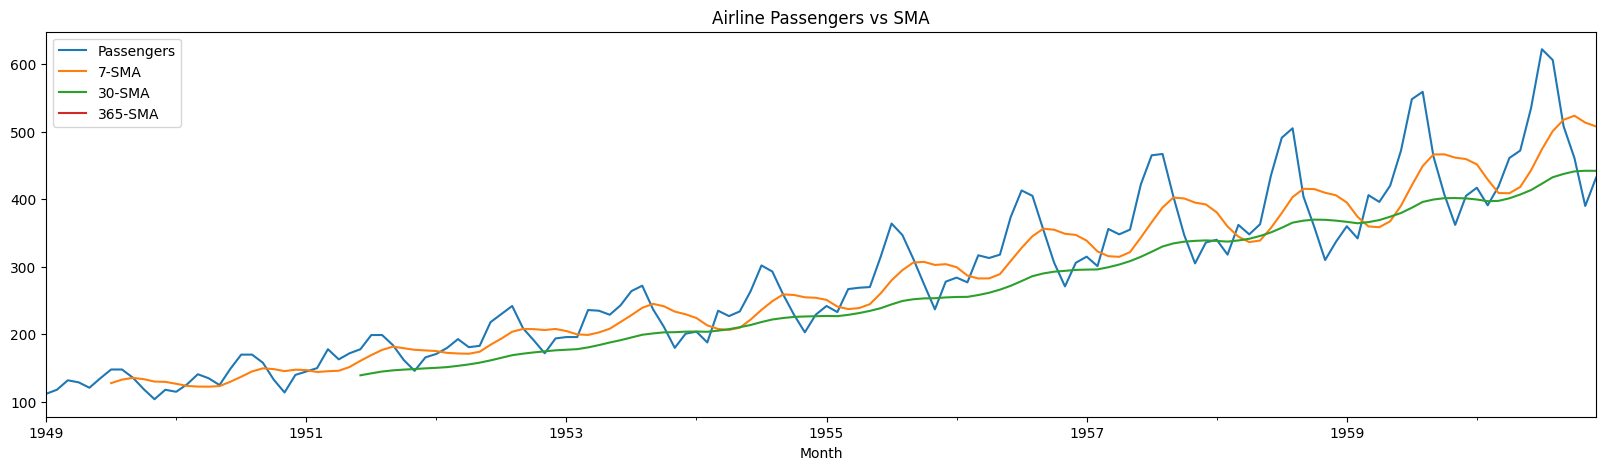

In [30]:
df_airline[['Passengers', '7-SMA', '30-SMA', '365-SMA']].plot(title='Airline Passengers vs SMA', figsize=(20, 5))

In [32]:
df_airline['EWMA12'] = df_airline['Passengers'].ewm(span=12, adjust=False).mean()

<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

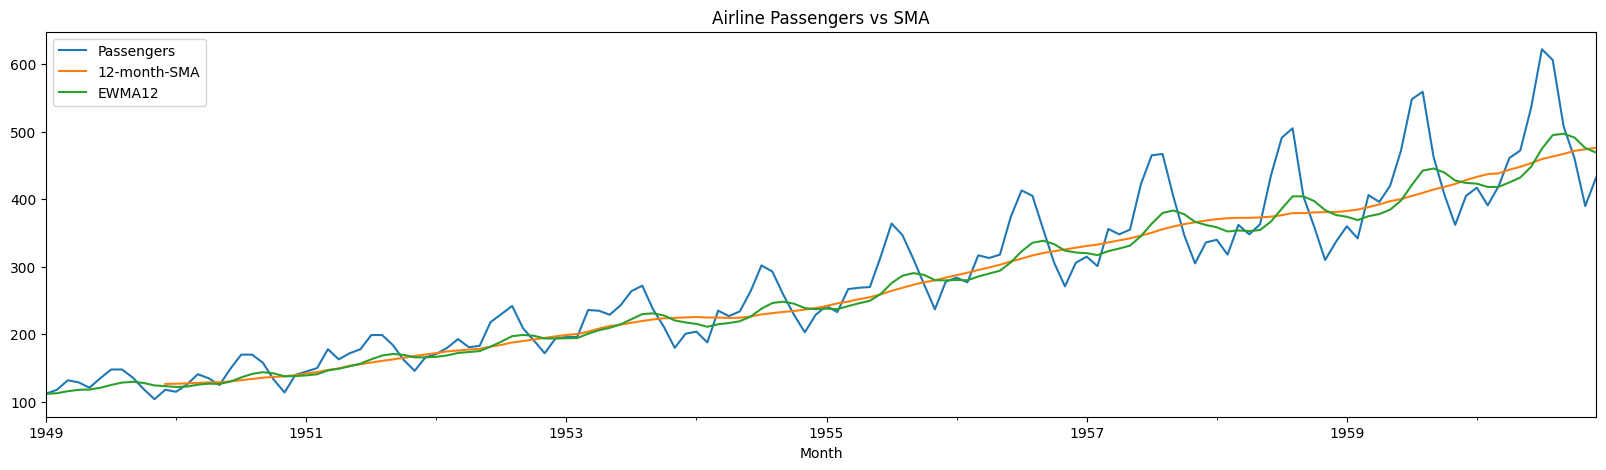

In [33]:
df_airline[['Passengers', '12-month-SMA', 'EWMA12']].plot(title='Airline Passengers vs SMA', figsize=(20, 5))

# Métodos de Holt-Winters

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [35]:
span = 12
alpha = 2/(span + 1)

In [36]:
df_airline['SEEA12'] = SimpleExpSmoothing(df_airline['Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

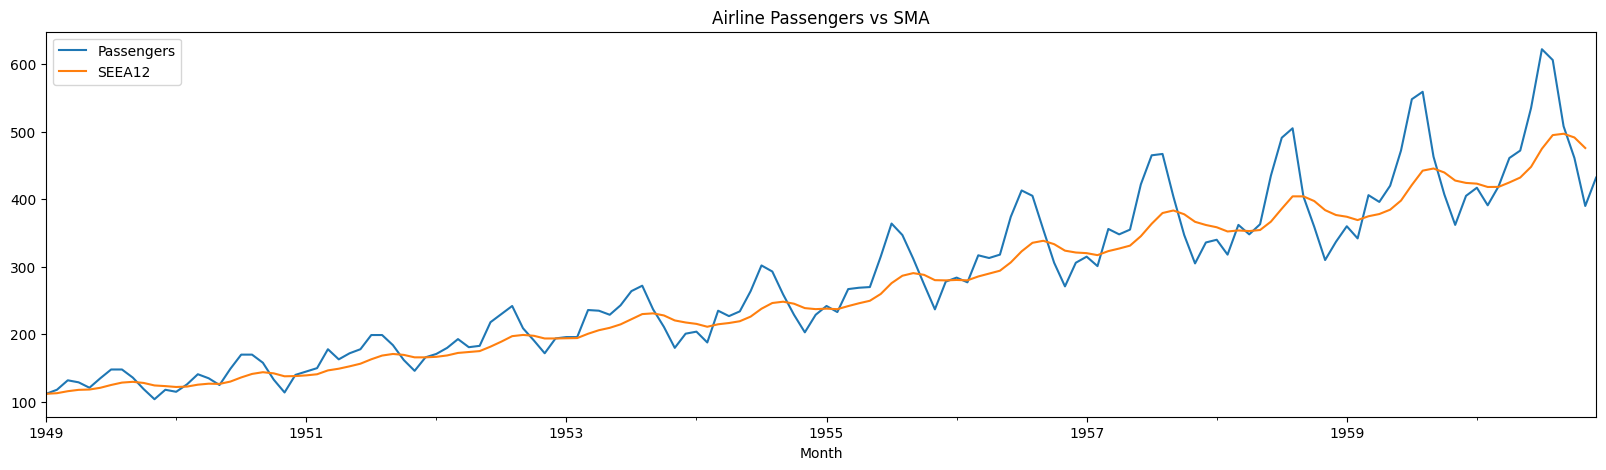

In [44]:
df_airline[['Passengers', 'SEEA12']].plot(title='Airline Passengers vs SMA', figsize=(20, 5))

<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

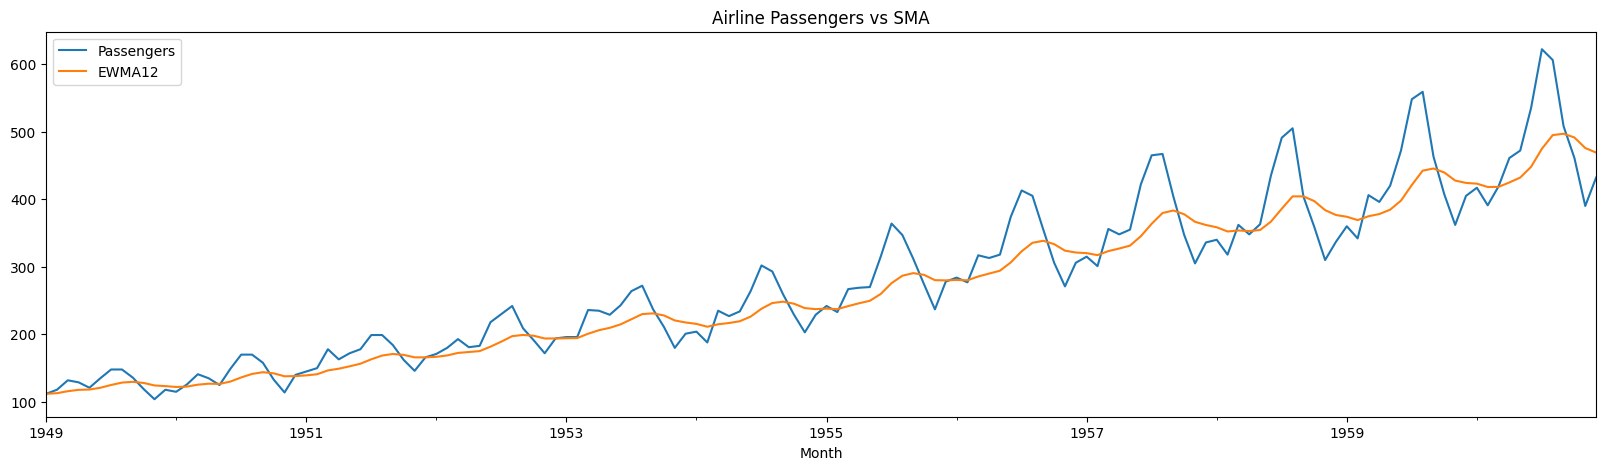

In [45]:
df_airline[['Passengers', 'EWMA12']].plot(title='Airline Passengers vs SMA', figsize=(20, 5))


# DES Double Exponential Smoothing

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
df_airline['DESadd12'] = ExponentialSmoothing(df_airline['Passengers'], trend='add').fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
df_airline['DESmul12'] = ExponentialSmoothing(df_airline['Passengers'], trend='mul').fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Airline Passengers vs DES'}, xlabel='Month'>

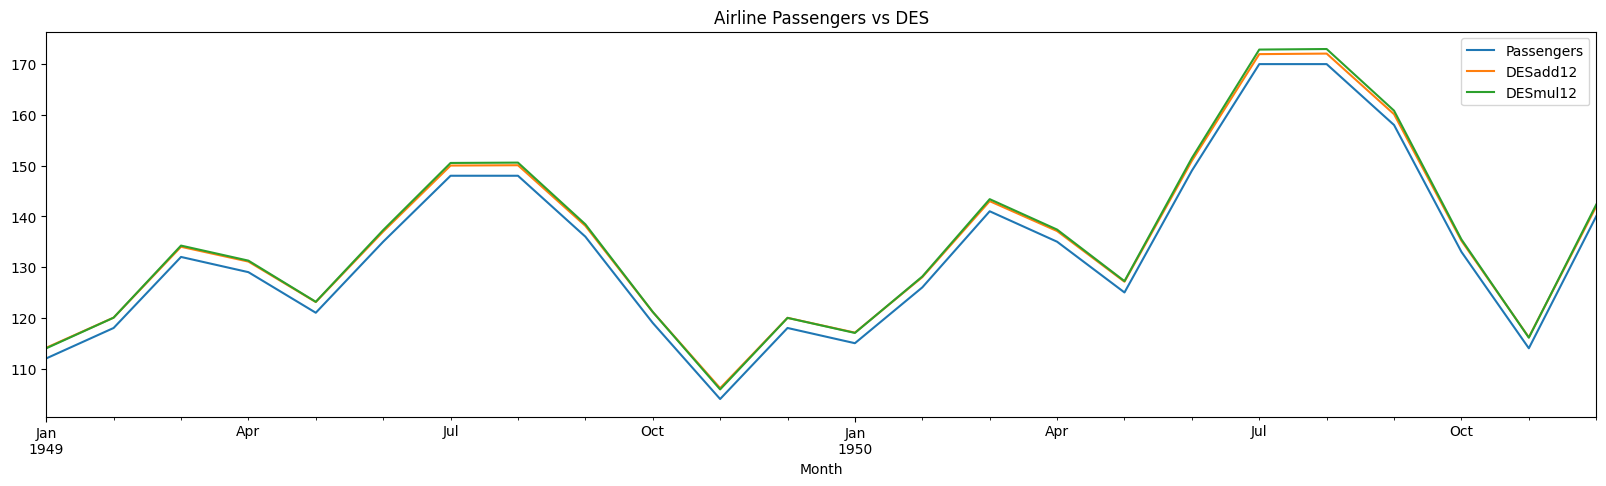

In [49]:
df_airline[['Passengers', 'DESadd12', 'DESmul12']].iloc[:24].plot(title='Airline Passengers vs DES', figsize=(20, 5))

In [50]:
df_airline['TESadd12'] = ExponentialSmoothing(df_airline['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df_airline['TESmul12'] = ExponentialSmoothing(df_airline['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Airline Passengers vs DES'}, xlabel='Month'>

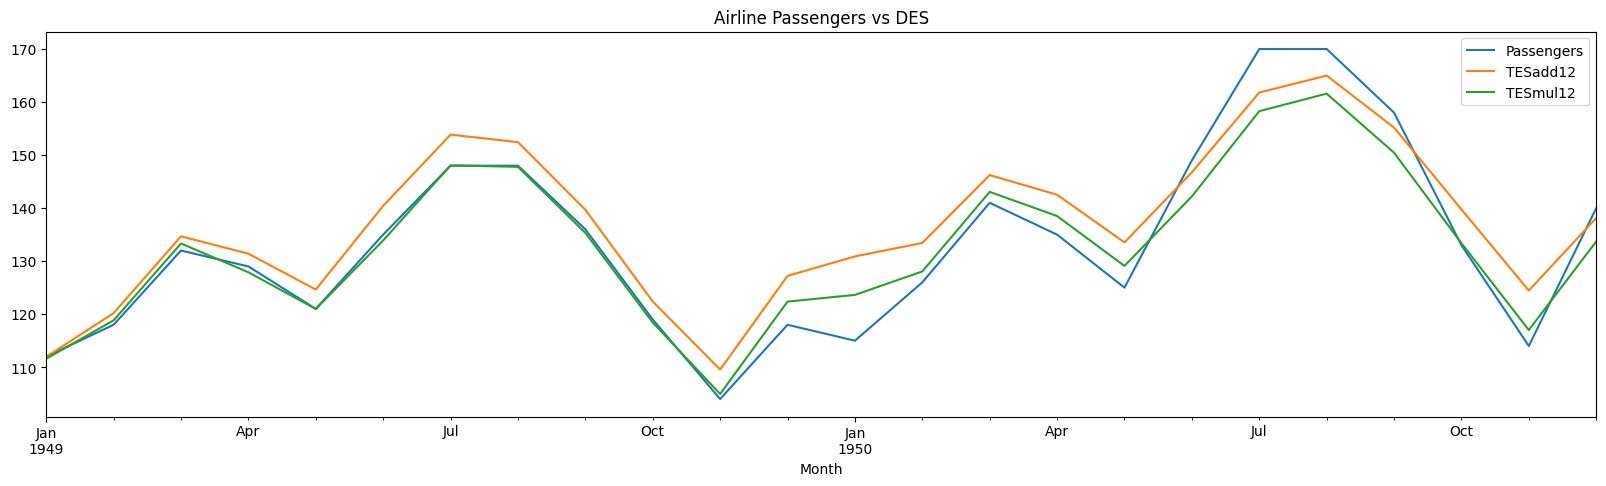

In [51]:
df_airline[['Passengers', 'TESadd12', 'TESmul12']].iloc[:24].plot(title='Airline Passengers vs DES', figsize=(20, 5))